In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [13]:
file=r"Analytics_train_data.csv"
df=pd.read_csv(file)
df

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54803,3030,Technology,region_14,Bachelor's,m,sourcing,1,48,3.0,17,0,0,78,0
54804,74592,Operations,region_27,Master's & above,f,other,1,37,2.0,6,0,0,56,0
54805,13918,Analytics,region_1,Bachelor's,m,other,1,27,5.0,3,1,0,79,0
54806,13614,Sales & Marketing,region_9,NaN,m,sourcing,1,29,1.0,2,0,0,45,0


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


In [15]:
df.nunique()

employee_id             54808
department                  9
region                     34
education                   3
gender                      2
recruitment_channel         3
no_of_trainings            10
age                        41
previous_year_rating        5
length_of_service          35
KPIs_met >80%               2
awards_won?                 2
avg_training_score         61
is_promoted                 2
dtype: int64

In [16]:
# dropping the ID column
df.drop('employee_id',axis=1,inplace=True)
df

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
54803,Technology,region_14,Bachelor's,m,sourcing,1,48,3.0,17,0,0,78,0
54804,Operations,region_27,Master's & above,f,other,1,37,2.0,6,0,0,56,0
54805,Analytics,region_1,Bachelor's,m,other,1,27,5.0,3,1,0,79,0
54806,Sales & Marketing,region_9,NaN,m,sourcing,1,29,1.0,2,0,0,45,0


In [17]:
df.nunique()

department               9
region                  34
education                3
gender                   2
recruitment_channel      3
no_of_trainings         10
age                     41
previous_year_rating     5
length_of_service       35
KPIs_met >80%            2
awards_won?              2
avg_training_score      61
is_promoted              2
dtype: int64

In [18]:
cat_cols=df.select_dtypes(include='object')
cat_cols.columns

Index(['department', 'region', 'education', 'gender', 'recruitment_channel'], dtype='object')

In [19]:
num_cols=df.select_dtypes(exclude='object')
num_cols.columns

Index(['no_of_trainings', 'age', 'previous_year_rating', 'length_of_service',
       'KPIs_met >80%', 'awards_won?', 'avg_training_score', 'is_promoted'],
      dtype='object')

In [20]:
df.isnull().sum()

department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

In [26]:
df['education'].fillna(method='ffill',inplace=True)
median=df['previous_year_rating'].median()
print(median)
df['previous_year_rating'].fillna(median,inplace=True)

3.0


In [27]:
df.isnull().sum()

department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
is_promoted             0
dtype: int64

In [29]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in cat_cols:
    df[i]=le.fit_transform(df[i])
df

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,7,31,2,0,2,1,35,5.0,8,1,0,49,0
1,4,14,0,1,0,1,30,5.0,4,0,0,60,0
2,7,10,0,1,2,1,34,3.0,7,0,0,50,0
3,7,15,0,1,0,2,39,1.0,10,0,0,50,0
4,8,18,0,1,0,1,45,3.0,2,0,0,73,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
54803,8,5,0,1,2,1,48,3.0,17,0,0,78,0
54804,4,19,2,0,0,1,37,2.0,6,0,0,56,0
54805,0,0,0,1,0,1,27,5.0,3,1,0,79,0
54806,7,33,0,1,2,1,29,1.0,2,0,0,45,0


In [30]:
# Data is ready
# splitting into X and y
X=df.drop('is_promoted',axis=1)
y=df['is_promoted']

In [1]:
X.shape,y.shape

NameError: name 'X' is not defined

In [32]:
# train_test_split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.2)

In [33]:
X_train.shape,y_train.shape

((43846, 12), (43846,))

In [34]:
X_test.shape,y_test.shape

((10962, 12), (10962,))

In [35]:
# Model Development with HyperParameter tuning Decision Tree
#metrics
from sklearn.metrics import accuracy_score,r2_score,\
                            precision_score,recall_score,\
                            f1_score,classification_report,\
                            roc_auc_score,roc_curve,auc
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV,cross_val_score
grid_tree=DecisionTreeClassifier() # base model
grid_tree

DecisionTreeClassifier()

In [36]:
# get the parameters in the decision tree
grid_tree.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [37]:
# creating a dictionary of hyper_parameters
param_grid={'criterion':['gini','entropy'], #2
            'max_depth':[3,4,5,6,7,8],      #6
            'min_samples_split':[2,3,4],    #3
            'min_samples_leaf':[1,2,3,4],   #4
            'random_state':[0,42,1234] }         #3

param_grid

{'criterion': ['gini', 'entropy'],
 'max_depth': [3, 4, 5, 6, 7, 8],
 'min_samples_split': [2, 3, 4],
 'min_samples_leaf': [1, 2, 3, 4],
 'random_state': [0, 42, 1234]}

In [38]:
# now these parameters we apply in decision tree
# base model and params are ready now we apply GridSearchCV

grid_search= GridSearchCV(grid_tree,          #base model
                         param_grid,          # parameters
                         scoring='accuracy',  # metrics
                         cv=5,
                         verbose=True)
grid_search

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 4, 5, 6, 7, 8],
                         'min_samples_leaf': [1, 2, 3, 4],
                         'min_samples_split': [2, 3, 4],
                         'random_state': [0, 42, 1234]},
             scoring='accuracy', verbose=True)

In [39]:
import time
start=time.time()
grid_search.fit(X_train,y_train)  # in dt without hyper parameters we fit directly in dtree here we are fitting in grid_search
end=time.time()
print('Total time taken is : ', end-start)

Fitting 5 folds for each of 432 candidates, totalling 2160 fits
Total time taken is :  111.73562669754028


In [40]:
grid_search.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=8, min_samples_leaf=2,
                       random_state=0)

In [41]:
grid_search.best_params_

{'criterion': 'entropy',
 'max_depth': 8,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'random_state': 0}

Accuracy is = 93.36%
F1 is = 39.43%
Precision is = 80.61%
Recall is = 26.1%


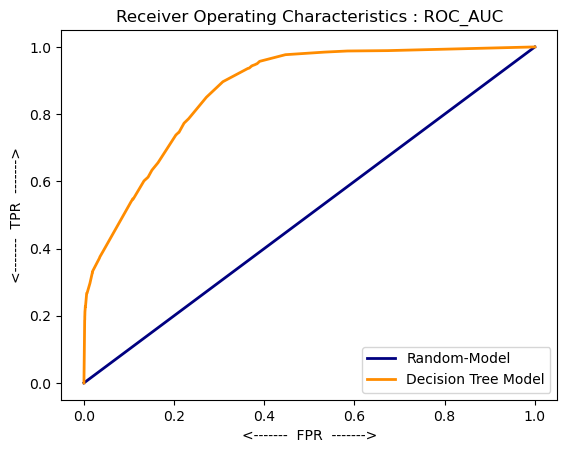

Computed Area Under the Curve (AUC)  0.8702830705380374


In [42]:
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier(criterion='entropy',max_depth=8,min_samples_leaf=2,min_samples_split=2,random_state=0)
dtree.fit(X_train,y_train)

# model prediction
y_pred_dt=dtree.predict(X_test)
y_pred_dt

#metrics
from sklearn.metrics import accuracy_score,r2_score,\
                            precision_score,recall_score,\
                            f1_score,classification_report,\
                            roc_auc_score,roc_curve,auc,\
                            confusion_matrix,ConfusionMatrixDisplay

# confusion_matrix
cmt_dt = confusion_matrix(y_test,y_pred_dt)

# making confusion matrix as flat array
tn , fp ,fn ,tp = cmt_dt.ravel()

#accuracy_score,precision_score,Recall_score,f1 score
acc_dt=round(accuracy_score(y_test,y_pred_dt)*100,2)
precision_dt=round(precision_score(y_test,y_pred_dt)*100,2)
Recall_dt=round(recall_score(y_test,y_pred_dt)*100,2)
f1_dt=round(f1_score(y_test,y_pred_dt)*100,2)
print(f"Accuracy is = {acc_dt}%",)
print(f"F1 is = {f1_dt}%",)
print(f"Precision is = {precision_dt}%",)
print(f"Recall is = {Recall_dt}%",)

# instead of using seaborn we use ConfusionMatrixDisplay
#ConfusionMatrixDisplay(cmt_dt).plot()
#plt.grid(False)

dtree.predict_proba(X_test)
y_dt_pred_prob=dtree.predict_proba(X_test)[:,1]   # class-1 probabilities
fpr,tpr,threshold=roc_curve(y_test,y_dt_pred_prob)
plt.plot([0,1],[0,1],color="navy",lw=2,label="Random-Model")
plt.plot(fpr,tpr,color="darkorange",lw=2,label="Decision Tree Model")
plt.xlabel("<-------  FPR  ------->")
plt.ylabel("<-------  TPR  ------->")
plt.title("Receiver Operating Characteristics : ROC_AUC")
plt.legend()
plt.show()
AUC_dt=auc(fpr,tpr)
print("Computed Area Under the Curve (AUC) ",AUC_dt)

In [43]:
test=pd.read_csv('test.csv')
test

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,NaN,1,1,0,77
1,74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51
2,72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,0,47
3,38562,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,0,65
4,64486,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,0,61
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23485,53478,Legal,region_2,Below Secondary,m,sourcing,1,24,3.0,1,0,0,61
23486,25600,Technology,region_25,Bachelor's,m,sourcing,1,31,3.0,7,0,0,74
23487,45409,HR,region_16,Bachelor's,f,sourcing,1,26,4.0,4,0,0,50
23488,1186,Procurement,region_31,Bachelor's,m,sourcing,3,27,NaN,1,0,0,70


In [45]:
id=test['employee_id']
id

0         8724
1        74430
2        72255
3        38562
4        64486
         ...  
23485    53478
23486    25600
23487    45409
23488     1186
23489     5973
Name: employee_id, Length: 23490, dtype: int64

In [47]:
test.drop('employee_id',axis=1,inplace=True)

test['education'].fillna(method='ffill',inplace=True)
median=test['previous_year_rating'].median()
print(median)
test['previous_year_rating'].fillna(median,inplace=True)


3.0


In [48]:
test.isnull().sum()

department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
dtype: int64

In [49]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in cat_cols:
    test[i]=le.fit_transform(test[i])
test

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,8,18,0,1,2,1,24,3.0,1,1,0,77
1,2,28,0,0,0,1,31,3.0,5,0,0,51
2,7,4,0,1,0,1,31,1.0,4,0,0,47
3,5,11,0,0,0,3,31,2.0,9,0,0,65
4,1,21,0,1,2,1,30,4.0,7,0,0,61
...,...,...,...,...,...,...,...,...,...,...,...,...
23485,3,11,1,1,2,1,24,3.0,1,0,0,61
23486,8,17,0,1,2,1,31,3.0,7,0,0,74
23487,2,7,0,0,2,1,26,4.0,4,0,0,50
23488,5,24,0,1,2,3,27,3.0,1,0,0,70


In [50]:
y_final_pred_dt=dtree.predict(test)
y_final_pred_dt

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [51]:
dff1=pd.DataFrame(zip(id,y_final_pred_dt),columns=['employee_id','is_promoted'])
dff1

,employee_id,is_promoted
0,8724,0
1,74430,0
2,72255,0
3,38562,0
4,64486,0
...,...,...
23485,53478,0
23486,25600,0
23487,45409,0
23488,1186,0


In [52]:
dff1.to_csv('final_submission.csv',index=False)